In [1]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)


5


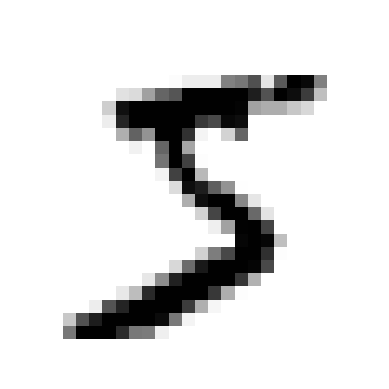

In [2]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

some_digit = x_train[0]
plot_digit(some_digit)
print(y_train[0])
plt.show()






In [3]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42).fit(x_train, y_train_5)


In [5]:
sgd_clf.predict(some_digit.reshape(1, -1))

array([ True])

In [6]:
from sklearn.model_selection import cross_val_score
cross_val_score(estimator=sgd_clf, 
                X = x_train, 
                y = y_train_5,
                cv = 3, 
                scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [7]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))

False


In [8]:
cross_val_score(dummy_clf, x_train, y_train_5, cv = 3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [9]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [10]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))


0.8370879772350012
0.6511713705958311


In [11]:
from sklearn.metrics import f1_score 
print(f1_score(y_train_5, y_train_pred))

0.7325171197343847


In [12]:
y_scores  = sgd_clf.decision_function([some_digit])

In [13]:
y_scores

array([2164.22030239])

In [14]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [15]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [16]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv = 3, method = 'decision_function')

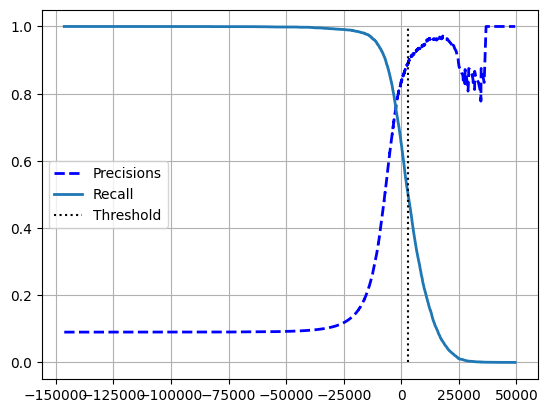

In [17]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, threshlods = precision_recall_curve(y_train_5, y_scores)
plt.plot(threshlods, precisions[:-1], 'b--', label = 'Precisions', linewidth = 2)
plt.plot(threshlods, recalls[:-1], label = 'Recall', linewidth = 2)
plt.vlines(threshold, 0, 1.0, 'k', 'dotted', label = 'Threshold')
plt.legend()
plt.grid()
plt.show()

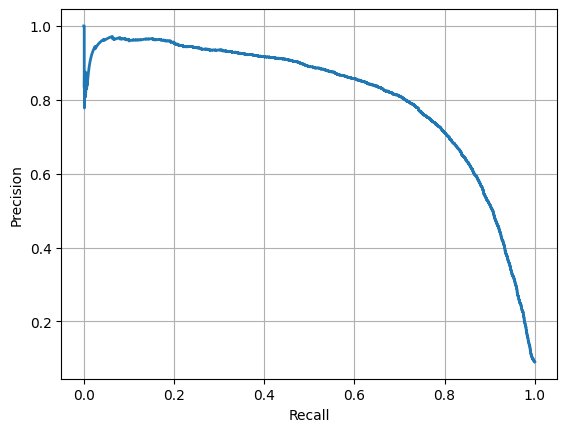

In [18]:
plt.plot(recalls, precisions, linewidth = 2, label = 'Precisions/Recall curve')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [19]:
idx_for_90_precision = (precisions >= 0.9).argmax()
threshlod_for_90_precision = threshlods[idx_for_90_precision]
threshlod_for_90_precision

np.float64(3370.0194991439557)

In [20]:
y_train_pred_90 = (y_scores > threshlod_for_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))



0.9
0.47980077476480354


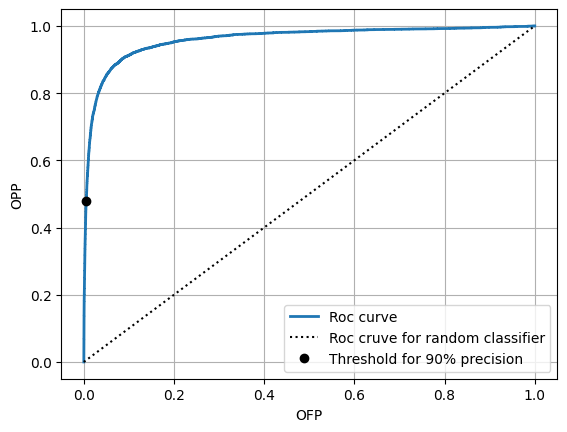

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, threshlods = roc_curve(y_train_5, y_scores)
idx_for_threshold_90 = (threshlods <= threshlod_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_90], fpr[idx_for_threshold_90]
plt.plot(fpr, tpr, linewidth = 2, label = 'Roc curve')
plt.plot([0,1], [0,1], 'k:', label = 'Roc cruve for random classifier')
plt.plot([fpr_90], [tpr_90], 'ko', label = 'Threshold for 90% precision')
plt.legend()
plt.xlabel('OFP')
plt.ylabel('OPP')
plt.grid()
plt.show()

In [22]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9604938554008616


In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv = 3, method = 'predict_proba')
y_probas_forest[:3]

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04]])

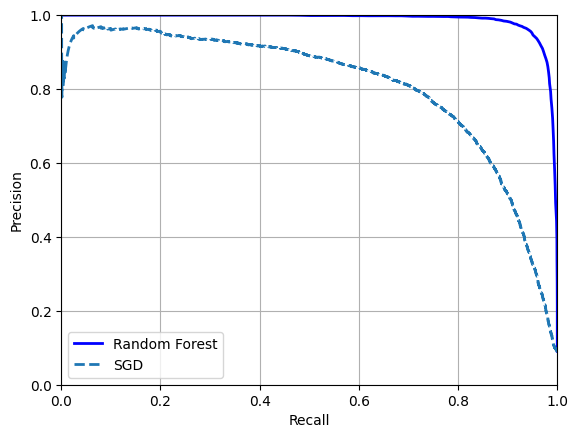

0.9274509803921569

In [24]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)


plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)

In [25]:
from sklearn.svm import SVC
svm_clf = SVC(random_state = 42)
svm_clf.fit(x_train[:2000], y_train[:2000])
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [26]:
some_digit_score = svm_clf.decision_function([some_digit])
some_digit_score.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [27]:
class_id = some_digit_score.argmax()
class_id

np.int64(5)

In [28]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype('float64'))
cross_val_score(sgd_clf, x_train_scaled, y_train, scoring='accuracy', cv = 3)


array([0.8983, 0.891 , 0.9018])

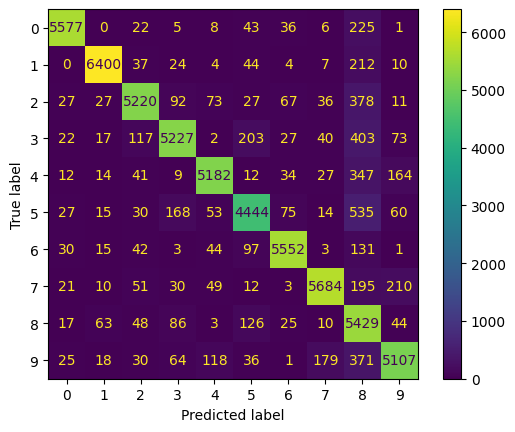

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv = 3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
plt.show()

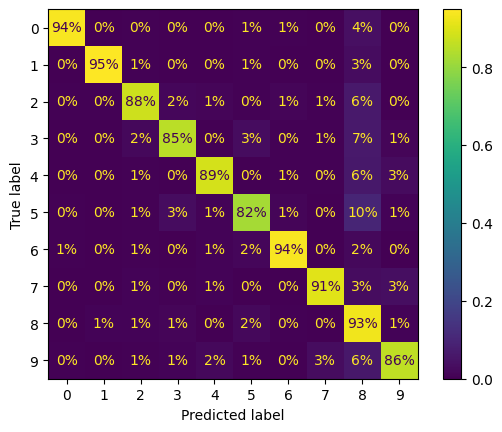

In [31]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = 'true', values_format = '.0%')
plt.show()

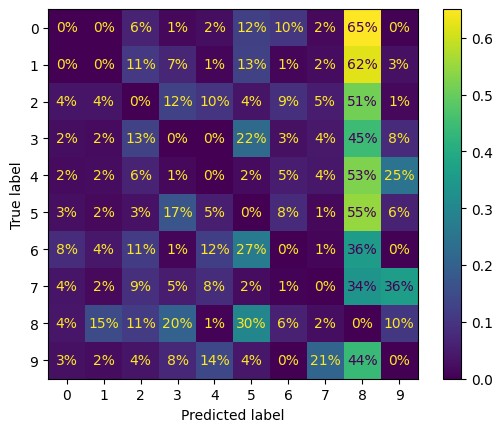

In [39]:
sample_weights = (y_train != y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = 'true', sample_weight = sample_weights, values_format = '.0%')
plt.show()

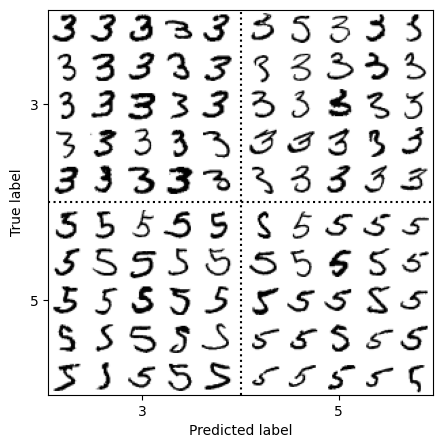

In [41]:
cl_a, cl_b = 3, 5
cl_a, cl_b = 3, 5
X_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

size = 5
pad = 0.2
plt.figure(figsize=(size, size))
for images, (label_col, label_row) in [(X_ba, (0, 0)), (X_bb, (1, 0)),
                                       (X_aa, (0, 1)), (X_ab, (1, 1))]:
    for idx, image_data in enumerate(images[:size*size]):
        x = idx % size + label_col * (size + pad)
        y = idx // size + label_row * (size + pad)
        plt.imshow(image_data.reshape(28, 28), cmap="binary",
                   extent=(x, x + 1, y, y + 1))
plt.xticks([size / 2, size + pad + size / 2], [str(cl_a), str(cl_b)])
plt.yticks([size / 2, size + pad + size / 2], [str(cl_b), str(cl_a)])
plt.plot([size + pad / 2, size + pad / 2], [0, 2 * size + pad], "k:")
plt.plot([0, 2 * size + pad], [size + pad / 2, size + pad / 2], "k:")
plt.axis([0, 2 * size + pad, 0, 2 * size + pad])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [42]:
import numpy as np 
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)
knn_clf.predict([some_digit])

array([[False,  True]])

In [43]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_knn_pred, average = 'macro')

0.9764102655606048